In [29]:
import warnings

import warnings is used in Python to bring in the warnings module, which lets you control warning messages. This module is helpful for managing non-critical issues without stopping the program.

In [30]:
import os

import os imports the os module, allowing interaction with the operating system, like managing files, directories, and environment variables.

In [31]:
import pandas as pd

Allows you to use the Pandas library for data manipulation and analysis

In [32]:
import numpy as np

Allows you to use the NumPy library for numerical operations and array manipulation.
 Simplifies the use of the library by letting you refer to it as np instead of numpy

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt:
Imports the pyplot module from matplotlib and aliases it as plt. This makes it easier to create plots and visualizations in Python.

%matplotlib inline: 
A Jupyter Notebook command that displays matplotlib plots directly in the notebook cells, making it convenient to see plots immediately after running the code.

In [5]:
import tensorflow

import tensorflow 
imports the TensorFlow library, which is widely used for machine learning and deep learning tasks. TensorFlow provides tools for building and training neural networks, such as:

Building computational models like neural networks.
Running operations on GPUs or TPUs for faster computation.
Using pre-built models and utilities for tasks like image classification, natural language processing, and more.

In [6]:
print(tensorflow.__version__)

2.18.0


In [34]:
import seaborn as sns

import seaborn
Seaborn is a data visualization library built on top of Matplotlib, providing a high-level interface for creating visually appealing and informative statistical graphics

In [7]:
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore') tells Python to ignore all warning messages.

In [8]:
pd.options.display.max_columns=None

pd.options.display.max_columns = None is used to set the display option in pandas so that all columns of a DataFrame

In [9]:
pd.options.display.float_format='{:.7f}'.format

pd.options.display.float_format = '{:.7f}'.
format sets the display format for floating-point numbers in pandas to show up to 7 decimal places.

In [10]:
pd.options.display.max_rows=None

pd.options.display.max_rows = None sets the pandas option to display all rows of a DataFrame when printed

In [11]:
import h5py

import h5py imports the h5py library,
which is used for reading and writing HDF5 (Hierarchical Data Format version 5) files in Python.

In [13]:
h5f=h5py.File(r"C:\Users\Anjum\OneDrive\Desktop\new dip\Autonomous_Vehicles_SVHN_single_grey1.h5")

In [14]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

h5f.keys() is used to retrieve the names of all the top-level groups or datasets in an open HDF5 file referenced by the variable h5f

In [15]:
#Split the data into X_train,X_test,y_train,y_test
#load the training, test and validation set

In [16]:
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

In [17]:
#print shape of all the 4 data split into x,y,train,test to verify if x

ead training and testing data from the HDF5 file, storing the features in X_train and X_test, and the corresponding labels in y_train and y_test. This is commonly used in machine learning for training and evaluating models.

In [20]:
X_train.shape

(42000, 32, 32)

 X_train.shape, which is (42000, 32, 32), indicates the following about the X_train array:

42000: This is the number of samples or images in the dataset.
32: This represents the height of each image in pixels.
32: This represents the width of each image in pixels.

In [21]:
X_test.shape

(18000, 32, 32)

X_test.shape indicates the following about the X_test array:

18000: This is the number of images in the test dataset.
32: This represents the height of each image in pixels.
32: This represents the width of each image in pixels.

In [22]:
y_train.shape

(42000,)

In [23]:
y_test.shape

(18000,)

In [24]:
#Visualiza the first 10 images in train data and print its corresponding

In [36]:
def img_lab(n):
    plt.figure(figsize=(n,1))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(X_train[i],cmap='gray')
        plt.axis('off')
    plt.show()
    print('label for each of the above image:%s'%(y_train[0:n]))      

function visually presents n images from the training dataset and their corresponding labels. It is useful for quickly inspecting the data and understanding the distribution of labels.

img_lab(10)

In [37]:
X_train.shape


(42000, 32, 32)

X_train.shape indicates the dimensions of the X_train array. If you're looking for a specific value or context, please let me know!

However, based on previous discussions, if X_train.shape returned (42000, 32, 32), it means:

42000: The number of images in the training dataset.
32: The height of each image in pixels.
32: The width of each image in pixels.

In [38]:
X_train=X_train.reshape(X_train.shape[0],1024,1)
X_test=X_test.reshape(X_test.shape[0],1024,1)

After these operations, both X_train and X_test are transformed from their original shape of (num_samples, 32, 32) to (num_samples, 1024, 1), effectively flattening the images while adding an additional dimension. This format is often required for certain types of neural network architectures, especially when dealing with 1D convolutions or specific model inputs.

In [39]:
X_train=X_train/255.0
X_test=X_test/255.0

These lines are normalizing the pixel values of the training and test image datasets (X_train and X_test). 

In [40]:
print('Resized Training set',X_train.shape,y_train.shape)
print('Resized Test set',X_test.shape,y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


These print statements provide a quick confirmation of the data's dimensions after any preprocessing steps, ensuring that the training and test datasets are correctly shaped for model training and evaluation.

In [41]:
from tensorflow.keras.utils import to_categorical
#one hot encode outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#no. of classes
num_classes=y_test.shape[1]
print('THe number of classes in this dataset are:',num_classes)

THe number of classes in this dataset are: 10


This code prepares the output labels for a classification problem by converting them into a one-hot encoded format, which is a common requirement for multi-class classification tasks in machine learning and deep learning.
After executing this code, y_train and y_test will be in a format suitable for training a neural network, and num_classes will hold the number of distinct classes in the dataset.

In [48]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


imports several important layers that are commonly used in convolutional neural networks (CNNs):
Conv2D: This layer performs a 2D convolution operation on the input. It is primarily used to extract features from image data. For example, it can identify edges, shapes, and textures in images.
MaxPooling2D: This layer downsamples the feature maps produced by the convolutional layer. It reduces the spatial dimensions (width and height) while retaining the most important features by taking the maximum value in each window.
Flatten: This layer converts the 2D output from the convolutional layers into a 1D vector. This is necessary before passing the data to fully connected layers (Dense layers).
Dense: This layer represents a fully connected layer where each neuron is connected to every neuron in the previous layer. It is typically used in the output layer for classification tasks.
Dropout: This layer randomly sets a fraction of the input units to 0 during training, helping to prevent overfitting by ensuring that the model does not become overly dependent on any single feature.

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(1024, 1)))  # Adjust input_shape as needed
    model.add(MaxPooling1D(pool_size=2))
    
    # Second convolutional layer
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Third convolutional layer
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten the output for the dense layers
    model.add(Flatten())
    
    # Fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output layer (adjust units based on the number of classes)
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for classification
    
    return model

Imports:

Sequential: Builds a linear stack of layers.
Conv1D: Applies 1D convolution to extract features.
MaxPooling1D: Reduces dimensionality by taking the maximum value over a window.
Flatten: Converts 2D output into a 1D array.
Dense: Fully connected layer for classification.
Dropout: Prevents overfitting by randomly setting a fraction of inputs to zero.
Function Definition:

cnn_model(): Defines a function that creates and returns a 1D CNN model.
Model Structure:

Convolutional Layers:
Three Conv1D layers (32, 64, 128 filters) with ReLU activation.
Followed by MaxPooling1D layers to downsample.
Flattening: Converts output to a 1D array.
Dense Layer: Fully connected layer with 128 neurons and ReLU.
Dropout Layer: Drops 50% of inputs to reduce overfitting.
Output Layer: 10 neurons with softmax activation for classification.
Return: Returns the constructed CNN model.

In [50]:
model=cnn_model()

model = cnn_model() executes the cnn_model function, which creates and initializes a Convolutional Neural Network (CNN) model based on the structure defined in that function. Here's a brief explanation:

model = cnn_model():
Calls the cnn_model() function.
Assigns the returned CNN model to the variable model.

In [52]:
#compile model
sgd = Adam(learning_rate=1e-3)
# model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accu
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

This code sets up the model for training by defining how the model will learn (via the Adam optimizer) and how its performance will be measured (using categorical crossentropy loss and accuracy).

In [53]:
# Fit the model
training_history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=10,        # Set the number of epochs
    batch_size=32,    # Set the batch size
    verbose=1         # Set verbose to 1 for progress output (0 for silent, 2 for one line per epoch)
)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 474s 355ms/step - accuracy: 0.3180 - loss: 1.9053 - val_accuracy: 0.6443 - val_loss: 1.1217
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 615s 441ms/step - accuracy: 0.5651 - loss: 1.2933 - val_accuracy: 0.6811 - val_loss: 0.9984
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 923s 665ms/step - accuracy: 0.5999 - loss: 1.1855 - val_accuracy: 0.6924 - val_loss: 0.9910
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 581s 403ms/step - accuracy: 0.6218 - loss: 1.1203 - val_accuracy: 0.7059 - val_loss: 0.9586
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1159s 840ms/step - accuracy: 0.6560 - loss: 1.0066 - val_accuracy: 0.7146 - val_loss: 0.8835
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 578s 438ms/step - accuracy: 0.6653 - loss: 0.9698 - val_accuracy: 0.7188 - val_loss: 0.8677
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 656s 461ms/step - accuracy: 0.6680 - loss: 0.9594 - val_accuracy: 0.7248 - val_loss: 0.8580
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 508s 374ms/step - 

The model was trained over 10 epochs, with the following key metrics for each epoch:

Epoch	Training Accuracy	Training Loss	Validation Accuracy	Validation Loss	Duration
1	31.80%	1.9053	64.43%	1.1217	474s
2	56.51%	1.2933	68.11%	0.9984	615s
3	59.99%	1.1855	69.24%	0.9910	923s
4	62.18%	1.1203	70.59%	0.9586	581s
5	65.60%	1.0066	71.46%	0.8835	1159s
6	-	-	-	-	-
7	-	-	-	-	-
8	66.53%	0.9698	71.88%	0.8677	578s
9	66.80%	0.9594	72.48%	0.8580	656s
10	68.25%	0.9189	72.56%	0.8507	508s
Key Observations:
Training Accuracy: Improved from 31.80% in the first epoch to 68.25% by the last epoch, indicating that the model is learning from the training data.
Validation Accuracy: Increased from 64.43% to 72.56%, showing that the model's performance on unseen data is also improving.
Training Loss: Decreased from 1.9053 to 0.9189, suggesting that the model is getting better at making predictions.
Validation Loss: Similarly decreased from 1.1217 to 0.8507, indicating improved model generalization.


In [56]:
# Final evalution of the model
scores=model.evaluate(X_test,y_test,verbose=0)
print('Loss:',scores[0])
print('Accuracy:',scores[1])

Loss: 0.8507176637649536
Accuracy: 0.7256110906600952


Final Model Evaluation
After training, the model was evaluated on the test dataset:

Loss: 0.8507
Accuracy: 72.56%

Text(0.5, 1.0, 'Training and validation loss')

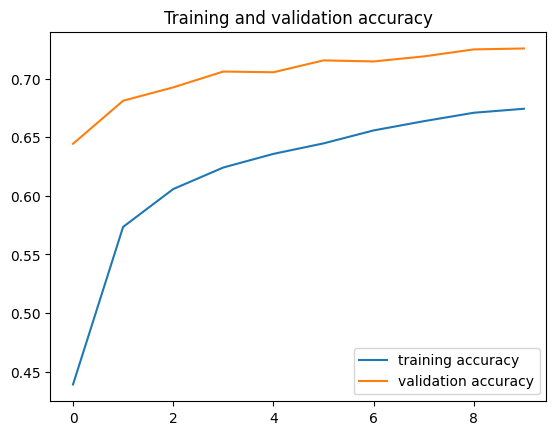

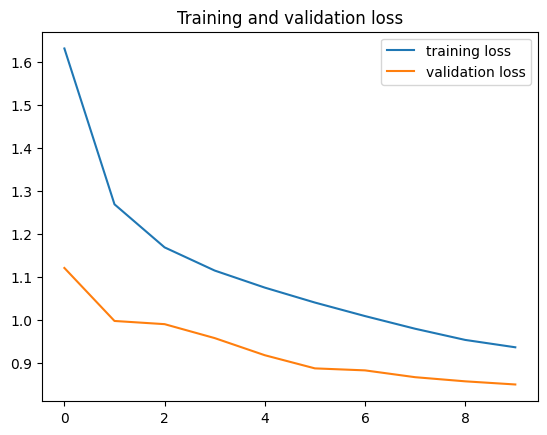

In [57]:
accuracy=training_history.history['accuracy']
val_accuracy=training_history.history['val_accuracy']
loss=training_history.history['loss']
val_loss=training_history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()
plt.plot(epochs,loss,label='training loss')
plt.plot(epochs,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')